<a href="https://colab.research.google.com/github/Neoneto/Coding_Dojo_Week_4/blob/main/Belt_Exam1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Belt Exam 1
Submitted by Kenneth Alaba


## Importing the data

In [42]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [43]:
# Load the data

## Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

## Opening the file
filename = '/content/drive/My Drive/Coding Dojo/Belt Exam/hotel_bookings.csv'

## Storing the data in a dataframe
df = pd.read_csv(filename)

## Show the first few rows
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Checking the dataframe

In [44]:
# Display the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  object 
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [45]:
# Checks which columns has missing values and how many
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

From the dataframe info, we can see that the columns children, country, agent, and company have missing values.

In [46]:
# Checks for inconsistencies
# List the unique values for each columns
for column in df.columns:
  if df[column].dtypes == 'O': # Only Object type has the tendency to have inconsistencies
    print(str(column))
    print(df[column].drop_duplicates().tolist())
  else:
    pass

hotel
['Resort Hotel', 'City Hotel']
arrival_date_month
['July', 'August', 'September', 'October', 'November', 'December', 'January', 'February', 'March', 'April', 'May', 'June']
arrival_date_week_number
['27', '#27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', 35, 6, 10, 15, 23, 48, 17, 34, 33, 36, 26, 42, 37, 45, 41, 24, 5, 21, 27, 28, 25, 14, 4, 38, 53, 40, 44, 51, 8, 11, 7, 39, 43, 52, 16, 20, 3, 47, 50, 19, 2, 29, 9, 12, 49, 22, 46, 13, 18, 32, 1, 31, 30]
meal
['BB', 'FB', 'HB', 'SC', 'Undefined']
country
['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IN

By manual inspection, we can see that the column arrival_date_week_number has an inconsistency where some values have a number sign before them, more specifically, there is a '#27' entry where it should be '27'. 

In [47]:
# Show the minimum values for each column
df.min()

hotel                             City Hotel
is_canceled                                0
lead_time                                  0
arrival_date_year                       2015
arrival_date_month                     April
arrival_date_day_of_month                  1
stays_in_weekend_nights                    0
stays_in_week_nights                       0
adults                                     0
children                                   0
babies                                     0
meal                                      BB
market_segment                      Aviation
distribution_channel               Corporate
is_repeated_guest                          0
previous_cancellations                     0
previous_bookings_not_canceled             0
reserved_room_type                         A
assigned_room_type                         A
booking_changes                            0
deposit_type                      No Deposit
agent                                      1
company   

In [48]:
# Show the maximum values for each column
df.max()

hotel                                Resort Hotel
is_canceled                                     1
lead_time                                     737
arrival_date_year                            2017
arrival_date_month                      September
arrival_date_day_of_month                      31
stays_in_weekend_nights                        19
stays_in_week_nights                           50
adults                                         55
children                                       10
babies                                         10
meal                                    Undefined
market_segment                          Undefined
distribution_channel                    Undefined
is_repeated_guest                               1
previous_cancellations                         26
previous_bookings_not_canceled                 72
reserved_room_type                              P
assigned_room_type                              P
booking_changes                                21


From the minimum and maximum values of each column, there seems to be an outlier in the column adr. 


In [49]:
# Checks entries with adr higher than 500
df.loc[df.adr > 500]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
15083,Resort Hotel,0,1,2015,July,29,15,0,1,2,0.0,0,BB,PRT,Corporate,Corporate,1,0,1,A,C,0,No Deposit,NaN,NaN,0,Transient,508.0,1,0,Check-Out,2015-07-16
48515,City Hotel,1,35,2016,March,13,25,0,1,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,1,Non Refund,12.0,NaN,0,Transient,5400.0,0,0,Canceled,2016-02-19
111403,City Hotel,0,0,2017,May,19,9,0,1,1,0.0,0,BB,ITA,Offline TA/TO,TA/TO,0,0,0,A,G,0,No Deposit,159.0,NaN,0,Transient,510.0,0,0,Check-Out,2017-05-10


Judging by the next highest values, the suspicious adr is extremely high and is most probably an outlier. Additionally, this booking is cancelled. It is best to drop the row containing this entry.

## Cleaning the data

### Filling missing values

In [50]:
# Copies the dataframe into a new dataframe where we will do the actual cleaning
new_df = df[:]

For the column 'children', since it contains float/int, we can easily assume that those missing values correspond to no children at all and fill those with the value 0. Additionally, we convert the values into int to match the given data dictionary. 

In [51]:
# Fill missing values in the column with 0
new_df.children.fillna(0, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [52]:
# Convert to int
new_df.children = new_df.children.astype(int)

For the missing values in the columns agent and company, we can assume that their booking is not made via an agent or unrelated to their company so we can replace the missing values with the string 'None', but, because the data dictionary tells us that these columns contain int type of data, we instead replace with the value 0 (since these columns also don't originally contain the value 0). 

In [53]:
# Checks how many entries in these columns have the value 0
(df[['company', 'agent']] == 0).sum()

company    0
agent      0
dtype: int64

In [54]:
# Fill the missing values in the columns agent and company 
new_df.agent.fillna(0, inplace = True)
new_df.company.fillna(0, inplace = True)

In [55]:
# Show how many unique countries in the data
len(df.country.drop_duplicates())

178

In [56]:
# Convert the two columns to int
new_df.agent = new_df.agent.astype(int)
new_df.company = new_df.company.astype(int)

From this, we know that the data coontains 178 unique countries but there are more than 190 countries. We can assume that the missinng values in the column country come from those countries and replace them with the string 'Others'.

In [57]:
# Fills missing values in the column country
new_df.country.fillna('Others', inplace = True)

In [58]:
# Checks that the data contains no more missing values
new_df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

For this data, since it contains no unique ID or something similar, we cannot cross reference from other entries to fill the missing values and we are left with making assumptions on how to best fill those missing values.

### Dealing with inconsistencies

From the previous cells, we know that the column arrival_date_week_number contains an inconsistency where entries keyed as '#27' are supposed to be '27'.



In [59]:
# Replace '#27' with 27 in the arrival_date_week_number
new_df['arrival_date_week_number'].replace({'#27': 27}, inplace = True)

In [60]:
# Lists all unique enetries in the column
new_df['arrival_date_week_number'].drop_duplicates().tolist ()

['27',
 27,
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 35,
 6,
 10,
 15,
 23,
 48,
 17,
 34,
 33,
 36,
 26,
 42,
 37,
 45,
 41,
 24,
 5,
 21,
 28,
 25,
 14,
 4,
 38,
 53,
 40,
 44,
 51,
 8,
 11,
 7,
 39,
 43,
 52,
 16,
 20,
 3,
 47,
 50,
 19,
 2,
 29,
 9,
 12,
 49,
 22,
 46,
 13,
 18,
 32,
 1,
 31,
 30]

This shows that aside from the inconsistency that we replaced, some entries are also keyed in as string instead of int.



In [61]:
# Converts all values in the column to int
new_df['arrival_date_week_number'] = new_df['arrival_date_week_number'].astype(int)

### Dropping suspicious entries

In [62]:
# Drop the suspicious row
new_df.drop(new_df[ new_df.adr > 1000 ].index, inplace = True)
new_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Final Check

In [63]:
# Checks the new dataframe
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119389 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119389 non-null  object 
 1   is_canceled                     119389 non-null  int64  
 2   lead_time                       119389 non-null  int64  
 3   arrival_date_year               119389 non-null  int64  
 4   arrival_date_month              119389 non-null  object 
 5   arrival_date_week_number        119389 non-null  int64  
 6   arrival_date_day_of_month       119389 non-null  int64  
 7   stays_in_weekend_nights         119389 non-null  int64  
 8   stays_in_week_nights            119389 non-null  int64  
 9   adults                          119389 non-null  int64  
 10  children                        119389 non-null  int64  
 11  babies                          119389 non-null  int64  
 12  meal            

The dataframe seems to be clean. There are no more inconsistency and missing values. Additionally, all the data types match the given data dictionary. We can now drop duplicate rows and proceed with analyzing the data.

In [64]:
# Deletes duplicated rows
new_df.drop_duplicates(inplace = True)

In [65]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87395 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87395 non-null  object 
 1   is_canceled                     87395 non-null  int64  
 2   lead_time                       87395 non-null  int64  
 3   arrival_date_year               87395 non-null  int64  
 4   arrival_date_month              87395 non-null  object 
 5   arrival_date_week_number        87395 non-null  int64  
 6   arrival_date_day_of_month       87395 non-null  int64  
 7   stays_in_weekend_nights         87395 non-null  int64  
 8   stays_in_week_nights            87395 non-null  int64  
 9   adults                          87395 non-null  int64  
 10  children                        87395 non-null  int64  
 11  babies                          87395 non-null  int64  
 12  meal                           

By dropping theduplicates, we were able to remove about 30,000 columns from the original dataframe.


## Plots


### Bookings per month

In [66]:
# import the calendar library
import calendar

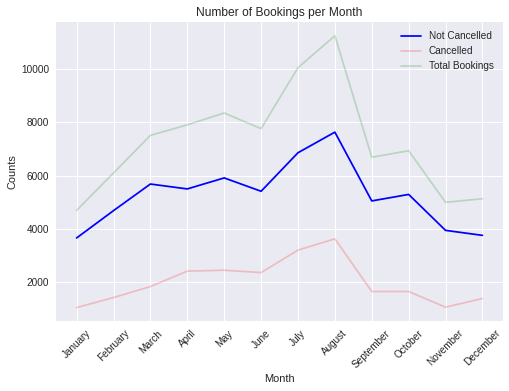

In [67]:
# Isolate the entries where the booking is canceled and not
not_canceled = new_df.loc[new_df.is_canceled == 0]
canceled = new_df.loc[new_df.is_canceled == 1]

# Initialize a list to store the counts
counts1 = list([])
counts0 = list([])

# Count the number of cancelled and not cancelled bookings for each month
for month in calendar.month_name[1:]:
  # not cancelled
  count0 = (not_canceled.arrival_date_month == str(month)).sum()
  counts0.append(count0)

  # cancelled
  count1 = (canceled.arrival_date_month == str(month)).sum()
  counts1.append(count1)

  
# Creates a line plot  
plt.style.use('seaborn') # Use seaborn style
plt.plot(calendar.month_name[1:], counts0, color = 'b', label = 'Not Cancelled')
plt.plot(calendar.month_name[1:], counts1, color = 'r', alpha = 0.2, label = 'Cancelled')
plt.plot(calendar.month_name[1:], np.array(counts1) + np.array(counts0), color = 'g', alpha = 0.2, label = 'Total Bookings')

# Grooms the plot
plt.xticks(rotation=45) # Rotate the x ticks
plt.title('Number of Bookings per Month')
plt.ylabel('Counts')
plt.xlabel('Month')
plt.legend()

From the line graph, we can see that the bookings, and for both the canceled and not canceled bookings, the peak season is around the months of July and August while the lowest demand is in the months of November, December, and January.

### Distribution of length of stay

(array([3.8676e+04, 1.6272e+04, 7.1320e+03, 4.6900e+02, 7.0800e+02,
        1.3000e+01, 4.6000e+01, 8.0000e+00, 2.8000e+01, 1.0000e+00,
        5.0000e+00, 1.0000e+00, 4.0000e+00, 3.0000e+00, 1.0000e+00,
        0.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.  ,  3.45,  6.9 , 10.35, 13.8 , 17.25, 20.7 , 24.15, 27.6 ,
        31.05, 34.5 , 37.95, 41.4 , 44.85, 48.3 , 51.75, 55.2 , 58.65,
        62.1 , 65.55, 69.  ]),
 <a list of 20 Patch objects>)

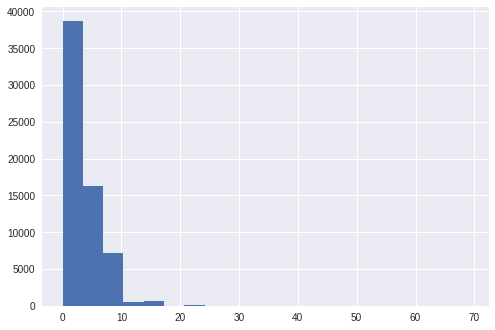

In [68]:
plt.hist(not_canceled.stays_in_week_nights + not_canceled.stays_in_weekend_nights, bins = 20)

In [69]:
new_df.loc[new_df.stays_in_week_nights > 10]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
31,Resort Hotel,0,95,2015,July,27,1,4,11,2,0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,241,0,0,Transient,63.86,0,0,Check-Out,2015-07-16
87,Resort Hotel,1,79,2015,July,27,3,6,15,2,1,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,242,0,0,Transient,108.73,0,2,Canceled,2015-04-15
406,Resort Hotel,0,113,2015,July,29,14,4,11,3,0,0,BB,PRT,Direct,Direct,0,0,0,H,H,1,No Deposit,0,0,0,Transient,187.50,1,3,Check-Out,2015-07-29
1149,Resort Hotel,1,47,2015,August,33,15,6,12,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240,0,0,Transient,181.94,0,0,Canceled,2015-07-06
1655,Resort Hotel,0,30,2015,September,37,7,13,33,2,0,0,SC,ESP,Online TA,TA/TO,0,0,0,A,I,17,No Deposit,240,0,0,Transient,0.00,0,1,Check-Out,2015-10-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106561,City Hotel,0,11,2017,January,3,15,13,30,0,0,0,SC,USA,Online TA,TA/TO,0,0,0,A,K,14,No Deposit,9,0,0,Transient,0.00,0,0,Check-Out,2017-02-27
109038,City Hotel,0,2,2017,March,10,9,8,19,0,0,0,SC,PRT,Direct,Direct,0,0,0,G,K,14,No Deposit,0,0,0,Transient,0.00,0,0,Check-Out,2017-04-05
112930,City Hotel,0,223,2017,May,20,16,4,11,2,0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,7,0,0,Transient,78.35,0,1,Check-Out,2017-05-31
117268,City Hotel,0,1,2017,July,30,29,4,11,2,0,0,BB,PRT,Direct,Direct,0,0,0,A,A,2,No Deposit,14,0,0,Transient,31.00,0,0,Check-Out,2017-08-13


In [70]:
len(df)

119390

From the histogram, there seems to be outliers that affects the binning of the histogram and preventing us from seeing the distribution. For this part, we will ignore these outliers since they only constitute only a small portion of the data. We can't simply drop this because the transaction is completed (Checked-Out) and is a valid data point.



No handles with labels found to put in legend.


Text(0.5, 1.0, 'Distribution of Total Length of Stay')

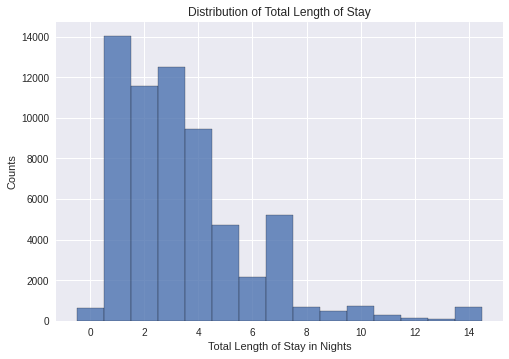

In [71]:
# Disregard the outliers
stay0 = not_canceled.drop(not_canceled[ not_canceled.stays_in_week_nights > 10].index)

# Calculate the total length of stay as the sum of their stays in weekend and weekdays
length_stay0 = stay0.stays_in_week_nights + stay0.stays_in_weekend_nights

# Create a histogram of the total length of stay
plt.hist(length_stay0, bins = max(length_stay0), align = 'left', edgecolor = 'k', alpha =0.8) # bin width of 1 and the bin center is an integer 

#
#plt.axvline(length_stay0.mean(), color = 'k', linestyle ='--', label = 'Mean Length of Stay')
#plt.text(length_stay0.mean(), 14000, 'Mean = ' + str(length_stay0.mean().round()))

# Grooms the plot
plt.legend()
plt.xlabel('Total Length of Stay in Nights')
plt.ylabel('Counts')
plt.title('Distribution of Total Length of Stay')

From the histogram, we can see that the distribution of the total length of stay for bookings that are not cancelled is skewed to the right and majority of the booking have a total length of stay of 1 to 7 days.\
This information could possibly be used to optimize room assignment to avoid situations like losing potential guests because because all the rooms are only available for N number of days (because of future bookings) and the guest needs to stay longer.  

### Correlation Between Columns
 

In [72]:
# Calculate the correlation between the numerical columns
corr = new_df.corr()

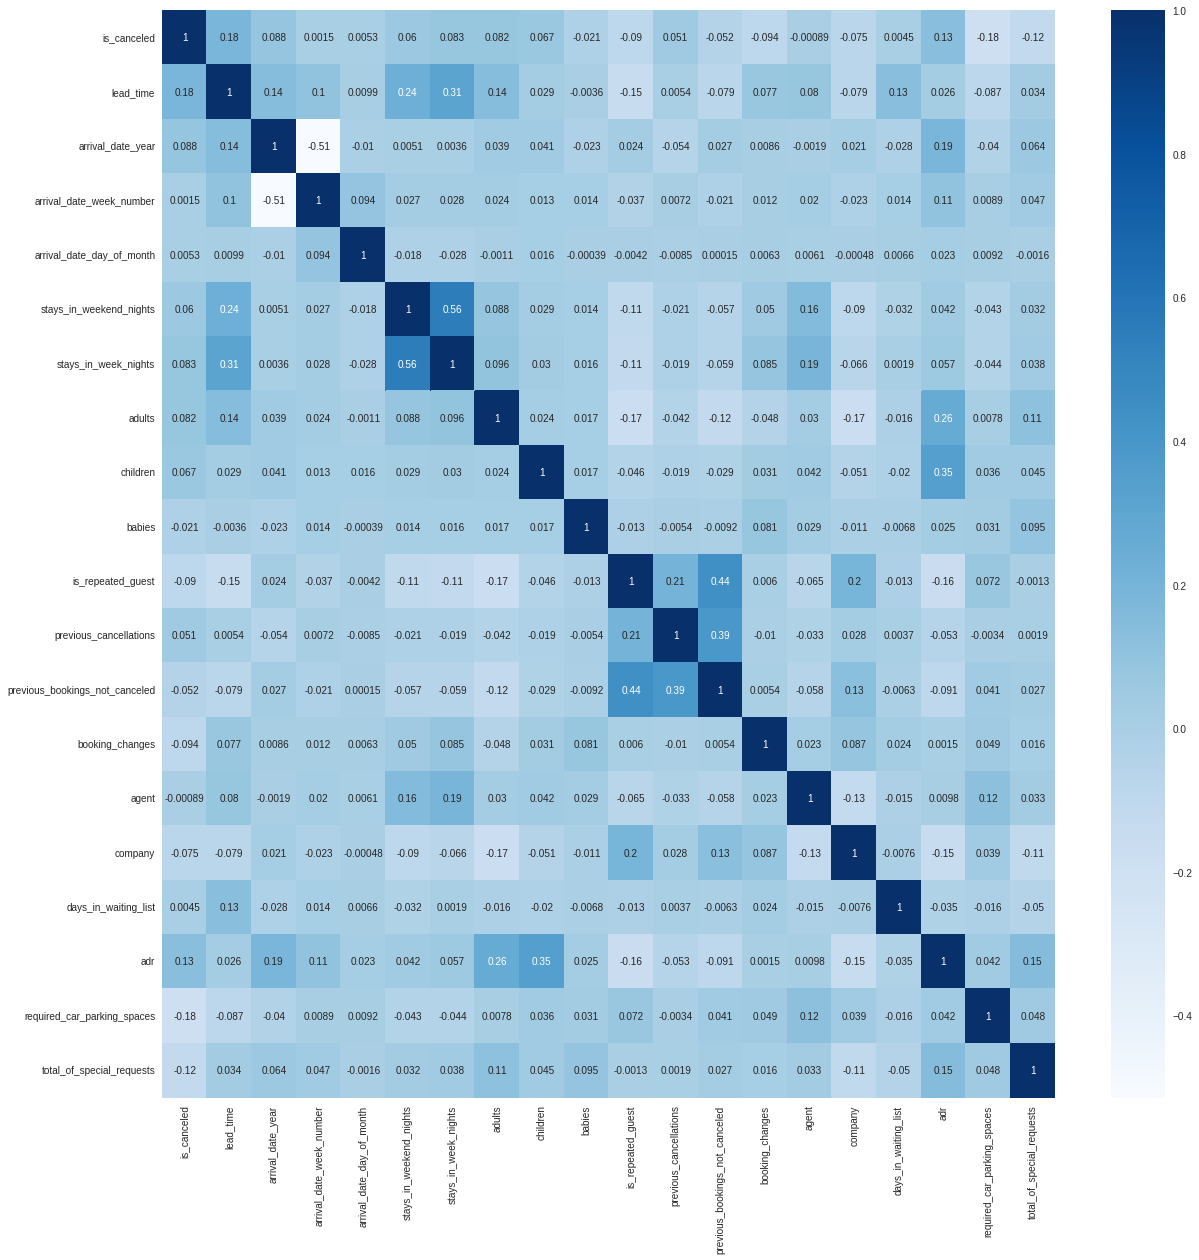

In [73]:
# Set the figure size
plt.figure(figsize = (20,20))

# Show the correlation between columns as a heatmap
sns.heatmap(corr, cmap = 'Blues', annot = True)
# plt.xticks(rotation = 45)

From the heatmap, we can see the columns with the most significant and strongest correlation by looking for colors, which represent their correlation coefficient, at the ends of the spectrum, i.e. for this visualization, the lightest blue (or white) color for negative correlation and darkest blue for positive correlation, except for the diagoanl entries. \
From the heatmap, the strongest negative correlation is between the arrival_date_week_number and the arrival_date_year but this does not mean anything since the two variables are already known to be dependent on each other, i.e. the same date almast always fall on the same week number. The rest of the negative correlations doesn't seem to be significant or strong, at least statistically. \
As for the positive correlation, the strongest is between the columns stays_in_weekend_nights and stays_in_week_nights, although with a value of 0.56, the correlation is only considered moderately strong. Still, this correlation could mean that significant number of bookings include both weekdays and weekends in a single booking, e.g. booking starts on a weekday and ends on a weekend or a weekday of the next week.\
Another positive correlation is between the columns previous_bookings_not_canceled and is_repeated_guest which suggests that repeated guests tend to not cancel their bookings.

### Market Segment Share

Others =  ['Complementary', 'Undefined', 'Aviation']


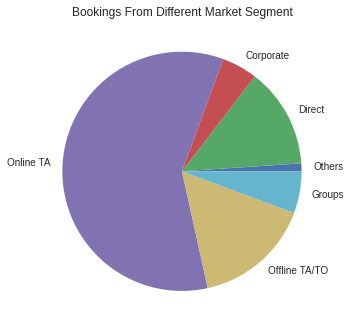

In [74]:
# Lists the unique values in market_segment columns
market_types = new_df.market_segment.drop_duplicates().tolist()

# Initialize lists
labels = ['Others']
others = list([]) # segments with small percentage are grouped into 'Others' category

type_shares = list([0])
temp_count = 0

# Calculate the percentage for each market segment
for market_type in market_types:
  temp_count = (new_df.market_segment == str(market_type)).sum()
  type_share = (temp_count/len(new_df))
  if type_share < 0.01: # if small percentage
    type_shares[0] += type_share # add to the percentageof others
    others.append(market_type) # add to the list of others
  else:
    type_shares.append(type_share) 
    labels.append(market_type)

# Create a pi chart
plt.pie(type_shares, labels = labels) 

# Shows the categories included in the others
plt.title('Bookings From Different Market Segment')
print('Others = ', others)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Average Daily Rate for each Market Segment')

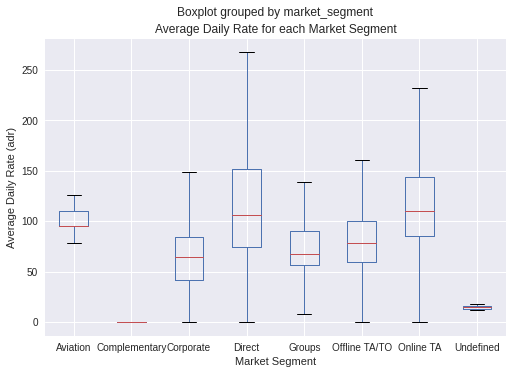

In [75]:
# Create a box plot of the adr for each market segment
new_df.boxplot(column = 'adr', by = 'market_segment',  showfliers=False) # hides outliers, for a cleaner plot

plt.ylabel('Average Daily Rate (adr)')
plt.xlabel('Market Segment')
plt.title('Average Daily Rate for each Market Segment')

From the pie chart, it tells us that majority of the bookings come from the Online TA market segment while the Others constitute only a small percentage. Included in the Others is the Aviation, Complementary, and Undefined market segments which each contributes less than 1% to the bookings, however, if we investigate the Average daily rate for each market segment, we can see that the Aviation market segment has one of the highest median adr, significantly higher than the rest of the segments in the Others category and almost at par with the Online TA which has the highest shares.